In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

This script investigates the out.pkl produced by `../mlpf/tfmodel/timing.py`

In [2]:
! ls ../

LICENSE          environment.yml  mlpf             prp
README.md        experiments      models           requirements.txt
README_tf.md     fcc              notebooks        scripts
data             habana           out.pkl
delphes          images           parameters


In [3]:
with open("../out.pkl", "rb") as f:
    out = pickle.load(f)

In [32]:
num_elems, means, stds, mem_used = [], [], [], []
for num_elem in out:
    num_elems.append(num_elem)
    means.append(out[num_elem]["mean"])
    stds.append(out[num_elem]["std"])
    mem_used.append(out[num_elem]["mem_used"])    

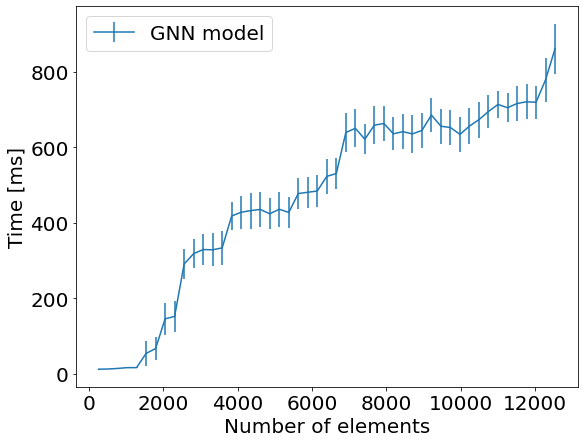

In [34]:
plt.rcParams.update({"font.size": 20})
### save plot
fig, ax = plt.subplots(figsize=(9, 7))

# ax.scatter(num_elems, means, marker="x", label="GNN model")
plt.errorbar(num_elems, means, yerr=stds, label="GNN model")

ax.legend()
ax.set_ylabel(r"Time [ms]"); 
ax.set_xlabel(r"Number of elements");

plt.savefig(f"/Users/fmokhtar/Desktop/scaling.pdf", bbox_inches='tight')

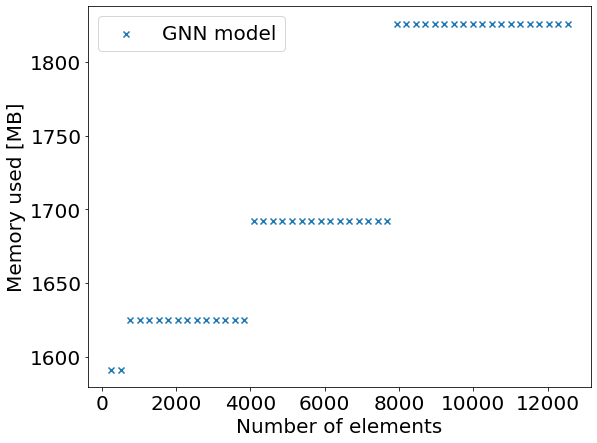

In [37]:
plt.rcParams.update({"font.size": 20})
### save plot
fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(num_elems, mem_used, marker="x", label="GNN model")

ax.legend()
ax.set_ylabel(r"Memory used [MB]"); 
ax.set_xlabel(r"Number of elements");

plt.savefig(f"/Users/fmokhtar/Desktop/scaling_memory.pdf", bbox_inches='tight')